# Empalme con la clase anterior

$$\min_G \max_D  
\mathbb{E}_{x \sim p_{\text{data}}}  [ \log D(x)] +
\mathbb{E}_{z \sim p} [ \log (1 - D(G(z))] \tag{1} $$
Esta corresponde a la ecuacion (1) del articulo original.
Sin embargo en la practica eso no se hace simulaneamente, se hace una y
luego la otra como lo vamos a ver en el algoritmo.

Vamos a opimizar la funcion de costo (perdida) (1)
Lo vamos a hacer en dos pasos:

Pensemos en la funcion de costo com $V(D,G)$, maximizamos
sobre $D$ y luego minimizamos sobre $G$.
1. Encontrar el maximo sobre $D$ de la funcion de costo


$$ \max_D V_G(D) = \max_D \left [
\mathbb{E}_{x \sim p_{\text{data}}}  [ \log D(x)] +
\mathbb{E}_{z \sim p} [ \log (1 - D(G(z))] \tag{1} \right ] $$
Vamos a encontrar que este maximo se da en

$$D_G^*(x) = \frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)} $$

2. Una encontremos este maximo, buscamos el minimo sobre $G$ de
$V_G(D^*_G)$. Seguimos a Goodfellow et al. Ellos llaman a la siguiene
funcion $V(G,D)$.

\begin{eqnarray}
V_G(D) &=& \int_x \log D(x)  p_{\text{data}}(x) dx + \int_z \log (1 - D(g(z)) dz  \\
&=& \int_x \log D(x) p_{\text{data}})(x) + \log (1 - D(x)) p_g(x) dx \tag{3}
\end{eqnarray}
La ecuacion (3) del articulo original.

En este momento queremos ver el integrando como una funcion donde la variable es $D(x)$. Es decir

$$ f(D(x)) = \log D(x) p_{\text{data}}(x) + \log (1 - D(x)) p_g(x) \$$
Goodfellow y amigos hacen otra cosa que lo que ya hago aca. Yo uso calculo diferencial

$$\frac{d}{d D(x)} f(D(x)) =  \frac{p_{\text{data}}(x)}{D(x)} - \frac{p_g(x)}{1 - D(x)} = 0 $$

Calculo diferencial nos dice que igualemos la derivada a 0.
Igualando a cero encontramos

$$ \frac{p_{\text{data}}(x)}{D(x)} =  \frac{p_g(x)}{1 - D(x)} $$
Debemos despejar $D(x)$.

\begin{eqnarray}
p_{\text{data}}(x) (1 - D(x)) &=& p_g(x) D(x) \\
p_{\text{data}}(x) &=& (p_{\text{data}}(x) + p_g(x)) D(x) \\
D(x) &=& \frac{p_{\text{data}}}{p_{\text{data}} + p_g(x)}.  \tag{2}
\end{eqnarray}

Nota: En general para probar que algo es maximo o es minimo
se debe calcular la segunda derivada. Si es $>0$ es maximo
si es $<0$ es minimo, si es$=0$, no se sabe (inflexion). Sin
embargo lo que estamos maximizando es un logaritmo que es concavo. O sea que es un maximo.

Vamos para el segundo paso que es **minimizacion**
Vamos a insertar $D^*_G(x)$ en la ecuacion (3) pero escribiendo esperanzas en vez de integrales.
Llamos $C(G)$ a la funcio que queremos minimizar. De forma que tenemos

Reemplazmos la ecuacion (2) en $V_G(D)$, o sea $V_G(D^*_G(x))$
\begin{eqnarray}
C(G) &=& \max_D V_G(D) \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x)[ \log D^*_G(x)] + \mathbb{E}_{z \sim p_z} [ \log (1 - D_G^*( G(z) ))] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x)[ \log D^*_G(x)] + \mathbb{E}_{z \sim p_z} [ \log (1 - D_G^*( x ))] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}}(x) \left [ \log
\frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log \left (1 -
\frac{p_{\text{data}}(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log
\frac{p_{\text{data}}(x)}{p_{\text{data}(x)} + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log \left (
\frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log 2
\frac{p_{\text{data}}(x)}{p_{\text{data}(x)} + p_g(x)}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log 2 \left (
\frac{p_g(x)}{p_{\text{data}}(x) + p_g(x)}
\right ) \right ] - 2 \log 2 \\
&=& \mathbb{E}_{x \sim p_{\text{data}}(x)}(x) \left [ \log  
\frac{p_{\text{data}}(x)}{\frac{p_{\text{data}(x)} + p_g(x)}{2}}
\right ] + \mathbb{E}_{z \sim p_z} \left [ \log  \left (
\frac{p_g(x)}{\frac{p_{\text{data}}(x) + p_g(x)}{2}}
\right ) \right ] - 2 \log 2 \\
&=& D_{KL} \left ( p_{\text{data}}(x) \parallel  \frac{p_{\text{data}}(x) + p_g(x) }{2} \right )
 +  D_{KL} \left ( p_g(x) \parallel  \frac{p_{\text{data}}(x) + p_g(x) }{2} \right )  - 2 \log 2
 \tag{5}
\end{eqnarray}







### Jensen-Shannon Divergence:
La idea detras de esta nueva divergencia son dos propiedades.

1. Suavizacion (promedio)
2. Simetria
3. No negatividad.

La definicion matematica es

$$D_{JS}(P \parallel Q) = \frac12 D_{KL}(P \parallel M) + \frac12 D_{KL}( Q \parallel M) $$

Donde

$$M = \frac12 ( P + Q). $$

La propiedad de no negatividad se puede expersar asi

$$D_{JS}(P \parallel Q) = 0 \quad \text{si y solo si} P = Q $$
De resto si $P \ne Q$, $D_{JS}(P \parallel Q) > 0$.

Con la definicion de la divergencia de Jensen-Shannon
enconramos que`

$$C(G) = 2 D_{JS}(p_{\text{data}}(x) \parallel p_g(x)) \ge 0 $$
El minimo de $C(G)$ se da cuando
$p_{\text{data}}(x) =p_g(x) $

De la ecuacion (2) $D(x)=1/2$ en este punto de equilibrio.





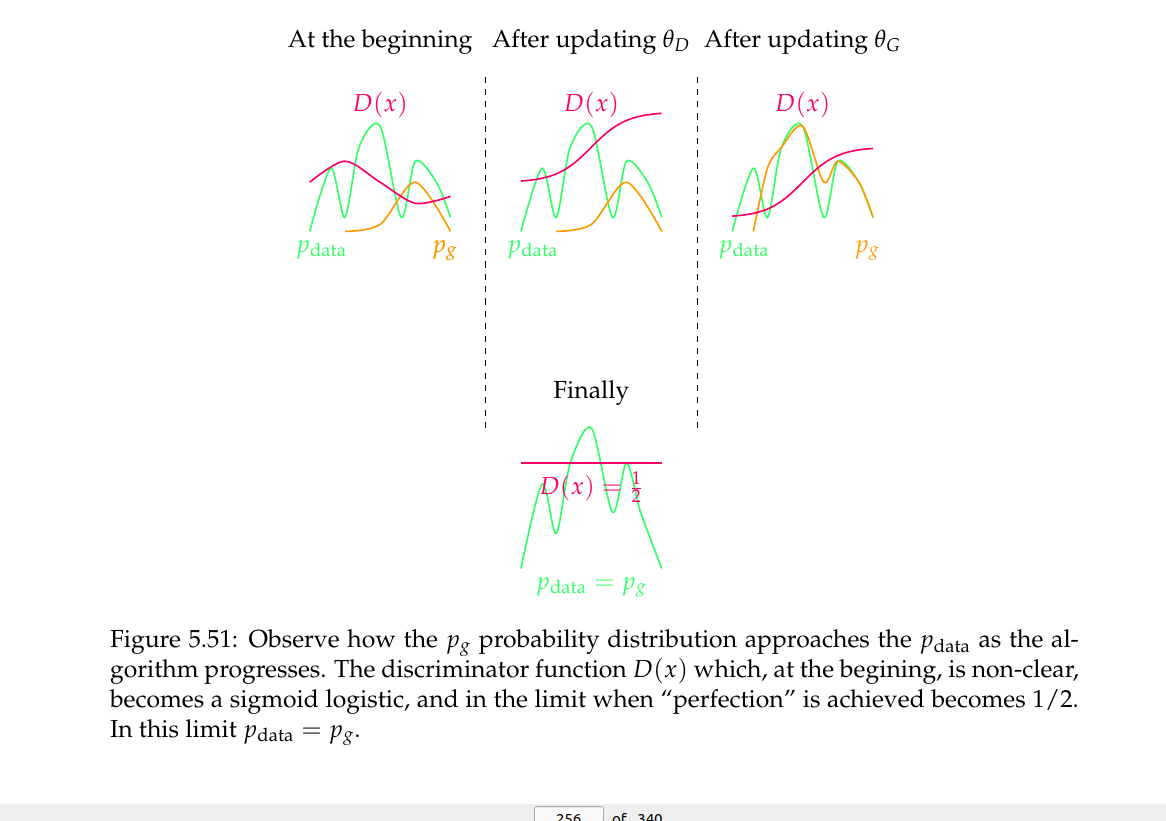

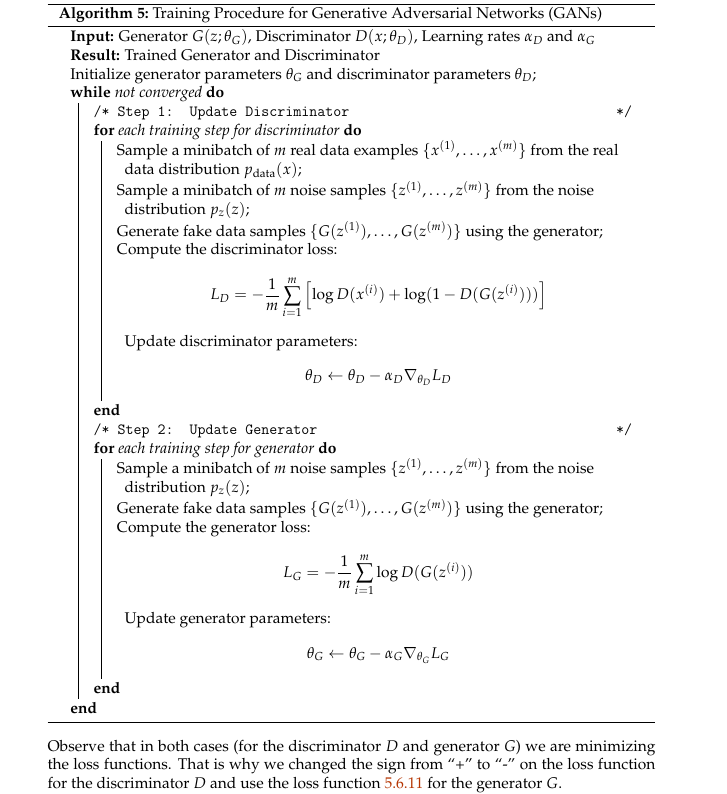

## De donde codigos?

* De "scratch" (desde 0). Casi nadie hace esto hoy en dia. Es como reinventar la rueda.

* Github, Gitlab.

* Google
* ChatGPT.

## cGANS:
Conditional Gans.

Varias notas

* Se usan datos (no ruido). Por ejemplo
se usan
    * hombres con gafas
    * les restan hombres
    * le suman mujeres:
    El resultado es mujeres con gafas.

* Otro ejemplo. Caballos y cebras.
El programa le puede poner las rayas a los caballos para que se vean como cebras.

* La funcion objetivo es muy parecida a la de cross-enropy.


# Transfer learning.
# NLP: Natural Language Processing.
Clases terminan 21 de noviembre.
28 de noviembre exposicion.